In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import tensorflow

from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import optimizers
from tensorflow.keras.models import load_model

In [2]:
from google.colab import drive
drive.mount('/content/drive')

%cd "/content/drive/MyDrive/SeptimoSemestre/ModDL"

Mounted at /content/drive
/content/drive/MyDrive/SeptimoSemestre/ModDL


In [3]:
!ls

cats_and_dogs_model.h5	forklift	   model2.h5  test   TransferLearning
checkpoints		forkliftCNN.ipynb  model.h5   train  validation


In [15]:
base = 'forklift'
train = os.path.join(base,'train')
validation = os.path.join(base,'val')
test = os.path.join(base,'test')

In [16]:
train_datagen = ImageDataGenerator(
							rescale = 1./255,
							# width_shift_range = 0.2,
							# height_shift_range = 0.2,
							# zoom_range = 0.2,
							horizontal_flip = True)

train_generator = train_datagen.flow_from_directory(
							train,
							target_size = (300, 300),
							batch_size = 25,
							class_mode ='categorical')

Found 2299 images belonging to 3 classes.


In [17]:
val_datagen = ImageDataGenerator(1./255)

val_generator = val_datagen.flow_from_directory(
							validation,
							target_size = (300,300),
							batch_size = 10,
							class_mode= 'categorical')

Found 340 images belonging to 3 classes.


In [8]:
conv_base= VGG16(weights='imagenet',
								include_top = False,
								input_shape = (300,300,3))

58889256/58889256 [==============================] - 0s 0us/step


In [9]:
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256,activation='relu'))
model.add(layers.Dense(3,activation='softmax'))

conv_base.trainable = False

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 9, 9, 512)         14714688  
                                                                 
 flatten (Flatten)           (None, 41472)             0         
                                                                 
 dense (Dense)               (None, 256)               10617088  
                                                                 
 dense_1 (Dense)             (None, 3)                 771       
                                                                 
Total params: 25332547 (96.64 MB)
Trainable params: 10617859 (40.50 MB)
Non-trainable params: 14714688 (56.13 MB)
_________________________________________________________________


In [18]:
model.compile(loss='categorical_crossentropy',
						optimizer='adam',
						metrics=['acc'])

In [19]:
history = model.fit_generator(train_generator,
				# steps_per_epoch= 25,
				epochs= 10,
				validation_data= val_generator,
				validation_steps= 25)

<ipython-input-19-a7ff1d807ece>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  history = model.fit_generator(train_generator,


Epoch 1/10
92/92 [==============================] - ETA: 0s - loss: 0.7371 - acc: 0.8934

/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


92/92 [==============================] - 594s 6s/step - loss: 0.7371 - acc: 0.8934 - val_loss: 22.5963 - val_acc: 0.5760
Epoch 2/10
92/92 [==============================] - 62s 674ms/step - loss: 0.0603 - acc: 0.9783 - val_loss: 19.0984 - val_acc: 0.5880
Epoch 3/10
92/92 [==============================] - 28s 298ms/step - loss: 0.0240 - acc: 0.9926 - val_loss: 19.2336 - val_acc: 0.6280
Epoch 4/10
92/92 [==============================] - 26s 283ms/step - loss: 0.0144 - acc: 0.9952 - val_loss: 16.8357 - val_acc: 0.6600
Epoch 5/10
92/92 [==============================] - 23s 251ms/step - loss: 0.0194 - acc: 0.9961 - val_loss: 13.2570 - val_acc: 0.7200
Epoch 6/10
92/92 [==============================] - 23s 253ms/step - loss: 0.0110 - acc: 0.9978 - val_loss: 14.3241 - val_acc: 0.6880
Epoch 7/10
92/92 [==============================] - 26s 280ms/step - loss: 0.0566 - acc: 0.9800 - val_loss: 18.0987 - val_acc: 0.6520
Epoch 8/10
92/92 [==============================] - 24s 260ms/step - loss: 

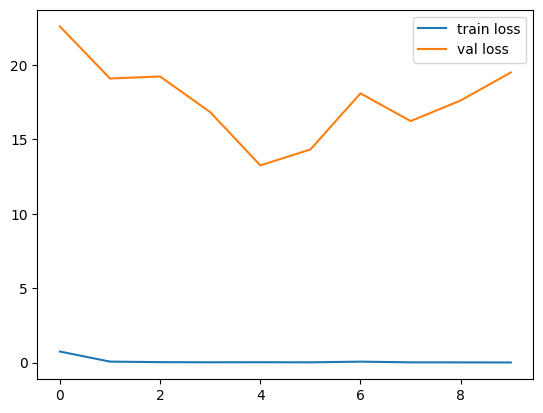

In [20]:
# loss
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.legend()
plt.show()

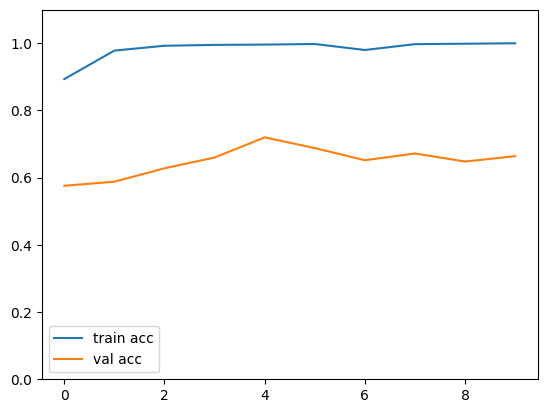

In [22]:
 # accuracies
plt.plot(history.history['acc'], label='train acc')
plt.plot(history.history['val_acc'], label='val acc')
plt.ylim([0,1.1])
plt.legend()
plt.show()

In [23]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
print("Accuracy = ",acc)
print("Validation Accuracy = ",val_acc)
print("Loss = ",loss)
print("Validation Loss = ",val_loss)

Accuracy =  [0.8934319019317627, 0.9782513976097107, 0.9926055073738098, 0.9952152967453003, 0.9960852265357971, 0.9978251457214355, 0.9799913167953491, 0.9973901510238647, 0.9986950755119324, 1.0]
Validation Accuracy =  [0.5759999752044678, 0.5879999995231628, 0.628000020980835, 0.6600000262260437, 0.7200000286102295, 0.6880000233650208, 0.6520000100135803, 0.671999990940094, 0.6480000019073486, 0.6639999747276306]
Loss =  [0.7371279001235962, 0.06025828421115875, 0.024027660489082336, 0.014391063712537289, 0.019409915432333946, 0.010958346538245678, 0.05657971650362015, 0.009992971085011959, 0.007023249287158251, 0.001524836989119649]
Validation Loss =  [22.596315383911133, 19.098352432250977, 19.233566284179688, 16.8356990814209, 13.25699234008789, 14.324088096618652, 18.098690032958984, 16.23341178894043, 17.623292922973633, 19.503355026245117]


In [24]:
test_datagen = ImageDataGenerator(1./255)
test_generator = test_datagen.flow_from_directory(
					test,
					target_size = (300, 300),
					batch_size = 15,
					class_mode= 'categorical')

test_loss, test_acc = model.evaluate_generator(test_generator, steps = 25)
print('\ntest acc :\n', test_acc)

Found 918 images belonging to 3 classes.


<ipython-input-24-4337728eee27>:8: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  test_loss, test_acc = model.evaluate_generator(test_generator, steps = 25)
/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(



test acc :
 0.6933333277702332


In [ ]:
model.save("model2.h5")

In [4]:
firstModel = "./model2.h5"
savedModel = tensorflow.keras.models.load_model(firstModel)

In [25]:
print(test_generator.class_indices)
print(train_generator.class_indices)
print(val_generator.class_indices)

{'forklift': 0, 'other': 1, 'tank': 2}
{'forklift': 0, 'other': 1, 'tank': 2}
{'forklift': 0, 'other': 1, 'tank': 2}


In [5]:
labels = {
    0 : "Forklift",
    1 : "Other",
    2 : "Tank"
}

1/1 [==============================] - 0s 85ms/step
[[1. 0. 0.]]
Forklift


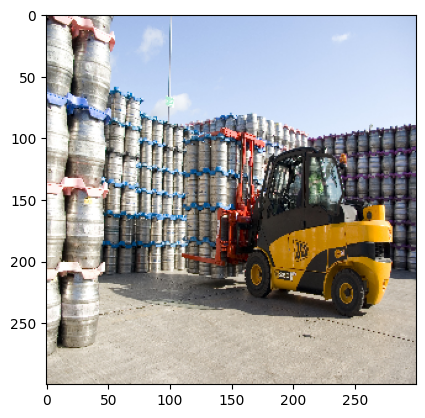

In [14]:
from keras.preprocessing import image

image_path = "./forklift/forklift.jpg"
img = image.load_img(image_path, target_size=(300, 300))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
prediction = savedModel.predict(img_array)
predicted_class_index = np.argmax(prediction)
print(prediction)
print(labels[predicted_class_index])

plt.imshow(img)